오차 행렬

[[99 19]
 [17 44]]

정확도: 0.7989, 정밀도: 0.6984, 재현율: 0.7213, F1: 0.7097, AUC:0.7801


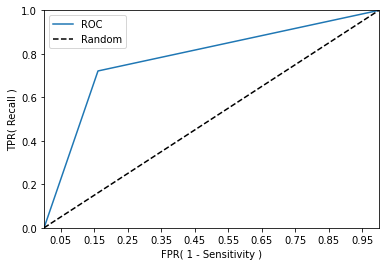

오차 행렬

[[104  14]
 [ 13  48]]

정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805, AUC:0.8341


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


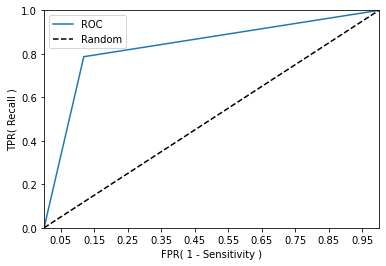

오차 행렬

[[106  12]
 [ 14  47]]

정확도: 0.8547, 정밀도: 0.7966, 재현율: 0.7705, F1: 0.7833, AUC:0.8344


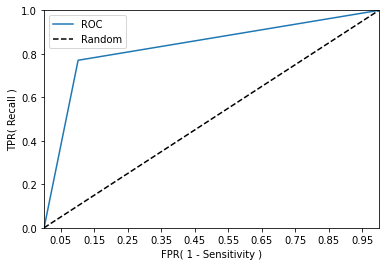

오차 행렬

[[117   1]
 [ 42  19]]

정확도: 0.7598, 정밀도: 0.9500, 재현율: 0.3115, F1: 0.4691, AUC:0.6515


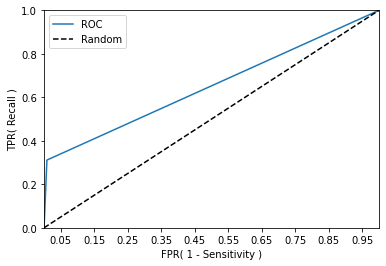

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    df['Embarked'] = df['Embarked'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


def roc_curve_plot(y_test , pred):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()


def get_clf_eval(name, y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return [name, accuracy, precision, recall, f1, roc_auc]

def result_compare(_from, _to, increase):
    print('##############################################################################################')
    print('##{0} 대비 {1} 에 대한 평가##\n'.format(_from, _to))
    print('정확도_증감: {0:.4f}, 정밀도_증감: {1:.4f}, 재현율_증감: {2:.4f}, F1_증감: {3:.4f}, AUC_증감:{4:.4f}'.format(*increase))
    print('##############################################################################################')
    

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

result = list()
#--------
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)

dt_result = get_clf_eval("DecisionTreeClassifier", y_test , dt_pred)
roc_curve_plot(y_test , dt_pred)

result.append(dt_result)
#--------
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)

lr_result = get_clf_eval("LogisticRegression", y_test , lr_pred)
roc_curve_plot(y_test , lr_pred)

result.append(lr_result)
#--------
rc_clf = RidgeClassifier()

rc_clf.fit(X_train , y_train)
rc_pred = rc_clf.predict(X_test)

rc_result = get_clf_eval("RidgeClassifier", y_test , rc_pred)
roc_curve_plot(y_test , rc_pred)

result.append(rc_result)
#--------
pa_clf = PassiveAggressiveClassifier()

pa_clf.fit(X_train , y_train)
pa_pred = pa_clf.predict(X_test)

pa_result = get_clf_eval("PassiveAggressiveClassifier", y_test , pa_pred)
roc_curve_plot(y_test , pa_pred)

result.append(pa_result)
#======

#increase = np.array(rc_result) - np.array(lr_result)
# print(np.array(rc_result) - np.array(lr_result))
#result_compare("LogisticRegression", "RidgeClassifier", list(increase))

In [81]:
from pandas import DataFrame
print(result)

resultNP = np.array(result)

print(resultNP.T[1:].tolist())

# result[1].argmax()

df = DataFrame (resultNP.tolist(), columns=["classname", '정확도', '정밀도', '재현율', 'F1', 'AUC'])
# df = DataFrame (resultNP.tolist(), columns=["classname", 'A', 'B', 'C', 'F1', 'AUC'])
df.set_index("classname", inplace=True)
df

[['DecisionTreeClassifier', 0.7988826815642458, 0.6984126984126984, 0.7213114754098361, 0.7096774193548387, 0.7801472631286468], ['LogisticRegression', 0.8491620111731844, 0.7741935483870968, 0.7868852459016393, 0.7804878048780488, 0.8341205890525146], ['RidgeClassifier', 0.8547486033519553, 0.7966101694915254, 0.7704918032786885, 0.7833333333333333, 0.8343984440122256], ['PassiveAggressiveClassifier', 0.7597765363128491, 0.95, 0.3114754098360656, 0.46913580246913583, 0.6515004167824396]]
[['0.7988826815642458', '0.8491620111731844', '0.8547486033519553', '0.7597765363128491'], ['0.6984126984126984', '0.7741935483870968', '0.7966101694915254', '0.95'], ['0.7213114754098361', '0.7868852459016393', '0.7704918032786885', '0.3114754098360656'], ['0.7096774193548387', '0.7804878048780488', '0.7833333333333333', '0.46913580246913583'], ['0.7801472631286468', '0.8341205890525146', '0.8343984440122256', '0.6515004167824396']]


,정확도,정밀도,재현율,F1,AUC
classname,,,,,
DecisionTreeClassifier,0.7988826815642458,0.6984126984126984,0.7213114754098361,0.7096774193548387,0.7801472631286468
LogisticRegression,0.8491620111731844,0.7741935483870968,0.7868852459016393,0.7804878048780488,0.8341205890525146
RidgeClassifier,0.8547486033519553,0.7966101694915254,0.7704918032786885,0.7833333333333333,0.8343984440122256
PassiveAggressiveClassifier,0.7597765363128491,0.95,0.3114754098360656,0.46913580246913583,0.6515004167824396


In [50]:
df.describe()

,정확도,정밀도,재현율,F1,AUC
count,4,4,4,4,4
unique,4,4,4,4,4
top,0.8547486033519553,0.95,0.3114754098360656,0.7096774193548387,0.7801472631286468
freq,1,1,1,1,1


In [94]:
df['정확도'].max()
# df['정확도'].astype(float).idxmax(axis=1)
df['정확도'].astype(float).idxmax()
print("각 항목별 최고 분류기는\n")
print("------------------\n")
print(df.astype(float).idxmax())
print("------------------\n")
# df['정확도'].ID
# print(df['정확도'].idxmax)
# df.Value
# type(df)
# df.iloc[df.Value.argmax(), 0:2]

각 항목별 최고 분류기는

------------------

정확도                RidgeClassifier
정밀도    PassiveAggressiveClassifier
재현율             LogisticRegression
F1                 RidgeClassifier
AUC                RidgeClassifier
dtype: object
------------------

